# Classical algorithms: random forest regressor

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = '/content/drive/MyDrive/Classroom/MiniProject_BlackHoleMassEstimation/typeII_AGN_metadata.csv'
df = pd.read_csv(file_path)

In [ ]:
df.head()

,index,plate,mjd,fiberid,z,h_beta_flux,h_beta_flux_err,oiii_5007_flux,oiii_5007_flux_err,h_alpha_flux,...,simard_Rchl_g,simard_Rchl_r,simard_Re,simard_e_Re,simard_e,simard_e_e,simard_nb,simard_e_nb,simard_PpS,simard_Pn4
0,0,266,51630,147,0.030694,58.52440,4.004864,594.88900,7.784786,307.65060,...,3.49,3.35,2.94,0.01,0.46,0.02,4.01,0.59,0.00,0.41
1,1,266,51630,158,0.036445,36.18832,2.318291,114.14670,3.213430,145.37080,...,3.78,3.78,1.69,0.01,0.34,0.09,0.78,0.01,0.78,0.49
2,2,266,51630,216,0.067470,122.33040,5.087923,966.63170,9.964752,472.36780,...,2.42,2.31,1.56,0.91,0.57,0.17,6.25,0.65,0.01,0.26
3,3,266,51630,264,0.148869,18.90960,3.879416,75.69289,3.566085,80.82387,...,6.59,5.83,4.67,0.45,0.39,0.04,1.69,0.39,0.54,0.46
4,4,266,51630,392,0.122263,121.33130,3.905878,452.44900,5.716667,576.23690,...,5.00,4.81,3.82,0.29,0.70,0.01,1.74,0.74,0.15,0.38


In [ ]:
# Define target and features
target = 'log_bh_mass'
features = [
    'h_beta_flux', 'h_beta_flux_err', 'oiii_5007_flux', 'oiii_5007_flux_err', 'h_alpha_flux', 'h_alpha_flux_err',
    'nii_6584_flux', 'nii_6584_flux_err', 'log_stellar_sigma', 'psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i', 'psfMag_z',
    'psfMagErr_u', 'psfMagErr_g', 'psfMagErr_r', 'psfMagErr_i', 'psfMagErr_z', 'mendel_logM_p50', 'mendel_logM_p16',
    'mendel_logM_p84', 'mendel_logMt_p50', 'mendel_logMt_p16', 'mendel_logMt_p84', 'mendel_logMb_p50', 'mendel_logMb_p16',
    'mendel_logMb_p84', 'mendel_logMd_p50', 'mendel_logMd_p16', 'mendel_logMd_p84', 'simard_b_t_g', 'simard_e_b_t_g',
    'simard_b_t_r', 'simard_e_b_t_r', 'simard_Rhlg', 'simard_Rhlr', 'simard_Rchl_g', 'simard_Rchl_r', 'simard_Re',
    'simard_e_Re', 'simard_e', 'simard_e_e', 'simard_nb', 'simard_e_nb', 'simard_PpS', 'simard_Pn4'
]

X = df[features]
y = df[target]

In [ ]:
# Handling missing values by filling with the median
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Drop rows where y_train is NaN
non_nan_indices = ~y_train.isna()
X_train = X_train[non_nan_indices]
y_train = y_train[non_nan_indices]

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
# Train the model
rf_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_regressor.predict(X_test)

In [ ]:
# Check and remove any NaNs in y_test or y_pred
mask = ~pd.isna(y_test) & ~pd.isna(y_pred)
y_test_clean = y_test[mask]
y_pred_clean = y_pred[mask]


In [ ]:
# Random Forest Regressor Predictions
y_pred_rf = rf_regressor.predict(X_test)

# Ensure consistent length by removing NaN values from both y_test and y_pred_rf
mask_rf = ~pd.isna(y_test) & ~pd.isna(y_pred_rf)
y_test_rf_clean = y_test[mask_rf]
y_pred_rf_clean = y_pred_rf[mask_rf]

# Calculate MSE, MAE, RMSE, and R2 for Random Forest
mse_rf = mean_squared_error(y_test_rf_clean, y_pred_rf_clean)
mae_rf = mean_absolute_error(y_test_rf_clean, y_pred_rf_clean)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test_rf_clean, y_pred_rf_clean)

# Range of the target variable
y_range_rf = np.max(y_test_rf_clean) - np.min(y_test_rf_clean)

# Calculate accuracy by percentage for Random Forest
mse_accuracy_rf = (1 - mse_rf / y_range_rf) * 100
mae_accuracy_rf = (1 - mae_rf / y_range_rf) * 100
rmse_accuracy_rf = (1 - rmse_rf / y_range_rf) * 100

# Print evaluation metrics for Random Forest
print("Random Forest Regressor Performance:")
print(f'MSE - Value: {mse_rf:.4f}, Accuracy: {mse_accuracy_rf:.2f}%')
print(f'MAE - Value: {mae_rf:.4f}, Accuracy: {mae_accuracy_rf:.2f}%')
print(f'RMSE - Value: {rmse_rf:.4f}, Accuracy: {rmse_accuracy_rf:.2f}%')
print(f'R2 - Value: {r2_rf:.4f}')
print("-" * 50)


Random Forest Regressor Performance:
MSE - Value: 0.0482, Accuracy: 98.83%
MAE - Value: 0.1653, Accuracy: 96.00%
RMSE - Value: 0.2195, Accuracy: 94.69%
R2 - Value: 0.8878
--------------------------------------------------


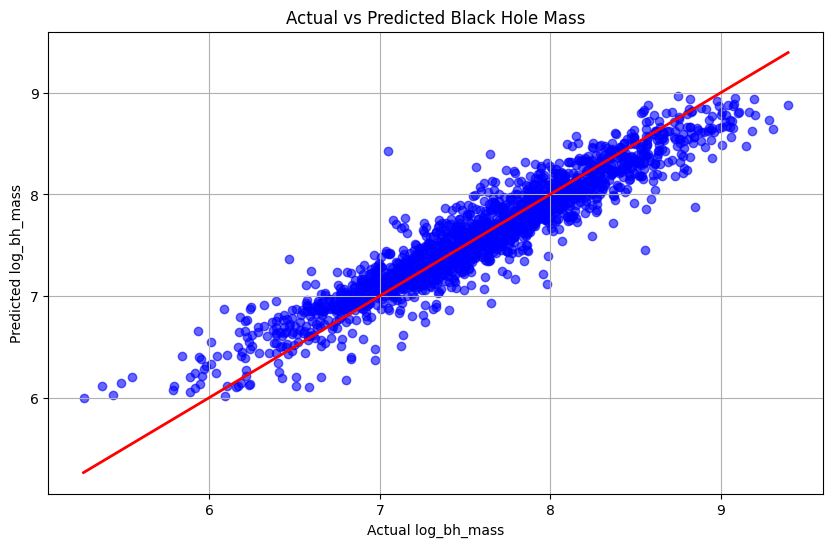

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_clean, y_pred_clean, alpha=0.6, color='blue')
plt.plot([min(y_test_clean), max(y_test_clean)], [min(y_test_clean), max(y_test_clean)], color='red', linewidth=2)
plt.title('Actual vs Predicted Black Hole Mass')
plt.xlabel('Actual log_bh_mass')
plt.ylabel('Predicted log_bh_mass')
plt.grid(True)
plt.show()
